# Heart Disease Classification - Part 1

In [257]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [258]:
heart_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header=None)
heart_data.columns = ['Age', 'Sex', 'ChestPain', 'trestBPS', 'chol', 'fbs', 'restecg', 'thalach',
                     'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

In [259]:
heart_data.head()

,Age,Sex,ChestPain,trestBPS,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [260]:
print('The dataset has {} rows and {} columns'.format(heart_data.shape[0], heart_data.shape[1]))

The dataset has 303 rows and 14 columns


In [261]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age          303 non-null float64
Sex          303 non-null float64
ChestPain    303 non-null float64
trestBPS     303 non-null float64
chol         303 non-null float64
fbs          303 non-null float64
restecg      303 non-null float64
thalach      303 non-null float64
exang        303 non-null float64
oldpeak      303 non-null float64
slope        303 non-null float64
ca           303 non-null object
thal         303 non-null object
target       303 non-null int64
dtypes: float64(11), int64(1), object(2)
memory usage: 33.2+ KB


In [262]:
heart_data.describe(include='all')

,Age,Sex,ChestPain,trestBPS,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,2.000000


# Impute missing variables

In [270]:
def impute_missing(df):
    heart_data.replace('?', np.NaN, inplace=True)
    for col in df:
        df[col].fillna(df[col].mode()[0], inplace=True)

impute_missing(heart_data)

## Change data types

In [272]:
def change_data(df):
    for col in df:
        if col in ['Sex', 'ChestPain', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']:
            df[col] = df[col].astype('category')
            
change_data(heart_data)

In [273]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
Age          303 non-null float64
Sex          303 non-null category
ChestPain    303 non-null category
trestBPS     303 non-null float64
chol         303 non-null float64
fbs          303 non-null category
restecg      303 non-null category
thalach      303 non-null float64
exang        303 non-null category
oldpeak      303 non-null float64
slope        303 non-null category
ca           303 non-null category
thal         303 non-null category
target       303 non-null category
dtypes: category(9), float64(5)
memory usage: 15.7 KB


# Exploratory Data Analysis

### Target Variable

In [228]:
heart_data['target'] = heart_data['target'].replace([2,3,4], 1)
heart_data['target'].cat.remove_categories([2,3,4], inplace=True)

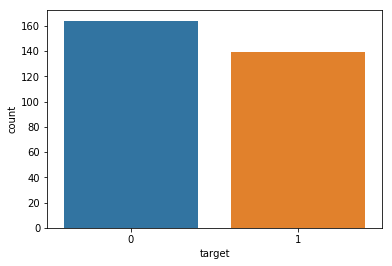

In [229]:
sns.countplot(heart_data['target'])

In [230]:
def plot_features(df, feature, target=None):
    fig =plt.figure(figsize=(8,12))
    plt.subplot(2,1,1)
    
    if df[feature].dtype.name == 'category':
        sns.countplot(data=df, x=feature)
    elif df[feature].dtype == 'float64':
        sns.distplot(df[feature])
        
    
    if df[feature].dtype.name=='category':
        plt.subplot(2,1,2)
        sns.countplot(x=feature, hue=target, data=df)
    else:
        pass

C:\Users\sharm\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


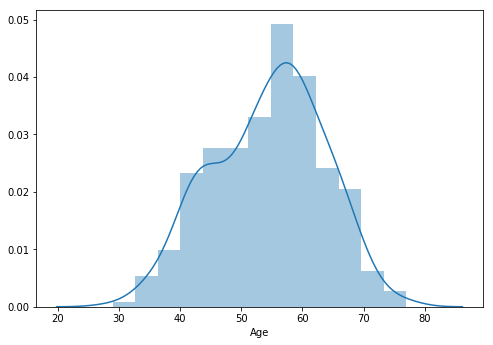

In [231]:
plot_features(heart_data, 'Age', 'target')

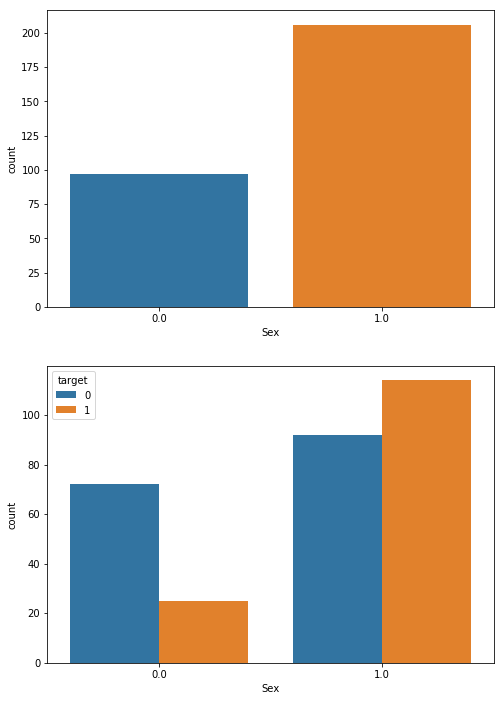

In [232]:
plot_features(heart_data, 'Sex', 'target')

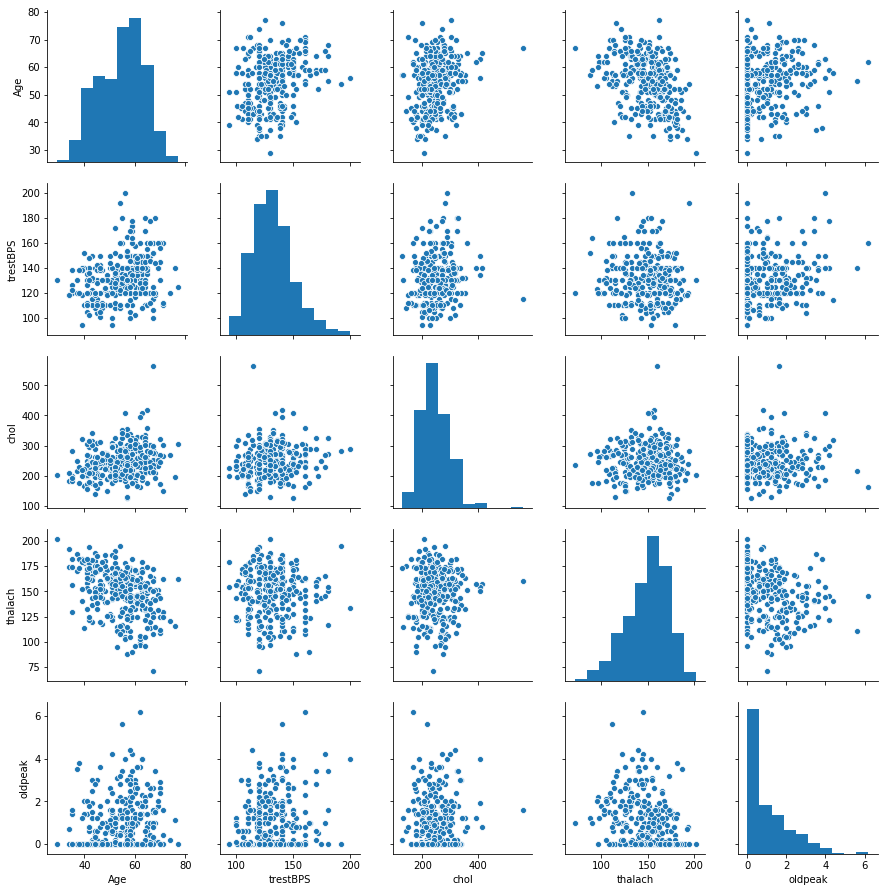

In [233]:
# Find numerical column
num_cols=[]
for cols in heart_data:
    if heart_data[cols].dtype in ['int64', 'float64']:
        num_cols.append(cols)

sns.pairplot(heart_data[num_cols])

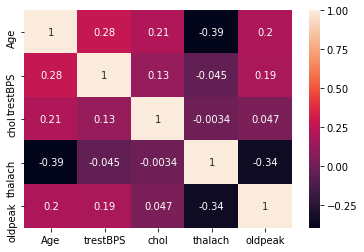

In [235]:
corr = heart_data.corr()
sns.heatmap(corr, annot=True)